q: Input

x: neuron value / output

w: weight

b: bias

z: neuron-internal value fed into the activation function

In [231]:
import numpy as np

# random input
q1 = np.random.uniform(-1, 1, 1_000)
q2 = np.random.uniform(-1, 1, 1_000)

# linear
X1 = q1 + q2
X2 = q1 - q2

# Nonlinear
# X1 = q1 * q2
# X2 = q1 / q2

## Define the Neuron

In [232]:

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def activation_func(z):
    #return sigmoid(z)
    #return np.tanh(z)
    return z
    # if z < 0:
    #     return z * 0.1
    # return z

def neuron(u, w, b):
    # u is a vector, w is a vector of same length, compute dot product
    z = np.dot(u, w) + b
    x = activation_func(z)
    return x

# q: input vector
# w: weights matrix 3-dimensional (layer, neuron, weight)
# b: bias matrix 2-dimensional (layer, neuron)
def forward(q, w, b):
    u = np.array(q)
    for layer in range(len(w)):
        u_next = []
        for neuron_idx in range(len(w[layer])):
            w_n = w[layer][neuron_idx]
            b_n = b[layer][neuron_idx]
            x = neuron(u, w_n, b_n)
            u_next.append(x)
        u = np.array(u_next)
    return u

    
def loss_func(x_ist, x_soll):
    return np.sum((np.array(x_ist) - np.array(x_soll))**2)

In [233]:
import copy

def train(start_w, start_b, u_set, x_m_set, learning_rate, epochs):
    w = copy.deepcopy(start_w)
    b = copy.deepcopy(start_b)
    loss_history = []
    
    for epoch in range(epochs):
        u = u_set[epoch % len(u_set)]
        x_m = x_m_set[epoch % len(x_m_set)]

        # forward prop
        x = forward(u, w, b)
        loss = loss_func(x, x_m)

        epsilon = 1e-6

        for i_1 in range(len(w)):
            for i_2 in range(len(w[i_1])):
                for i_3 in range(len(w[i_1][i_2])):
                    # wiggle w a little bit
                    w_perturbed = copy.deepcopy(w)
                    
                    w_perturbed[i_1][i_2][i_3] += epsilon
                    x_perturbed = forward(u, w_perturbed, b)
                    loss_perturbed_pos = loss_func(x_perturbed, x_m)

                    w_perturbed = copy.deepcopy(w)
                    w_perturbed[i_1][i_2][i_3] -= epsilon
                    x_perturbed = forward(u, w_perturbed, b)
                    loss_perturbed_neg = loss_func(x_perturbed, x_m)

                    grad = (loss_perturbed_pos - loss_perturbed_neg) / (2 * epsilon)
                    w[i_1][i_2][i_3] -= learning_rate * grad

        loss_history.append(loss)
    
    return w, b, loss_history

# Training

In [234]:

start_w = [
    np.random.uniform(-1, 1, (2, 2)),  # hidden layer: 2 neurons, 2 inputs each
    np.random.uniform(-1, 1, (2, 2))   # output layer: 2 neurons, 2 inputs each
]

# Bias hardcoded to 0
start_b = [
    np.zeros(2),  # hidden layer biases
    np.zeros(2)   # output layer biases
]

# input
q = [[q1[i], q2[i]] for i in range(len(q1))]

# output:
x_m = [[X1[i], X2[i]] for i in range(len(q1))]

w, b, loss_history = train(start_w, start_b, q, x_m, learning_rate=0.01, epochs=20000)

print(f"Trained weight: {w}")
print(f"Trained bias: {b}")
print(f"Final loss: {loss_history[-1]:.4f}")

Trained weight: [array([[ 0.80835157,  0.8337431 ],
       [ 0.79037202, -0.75680089]]), array([[ 1.21754806,  0.01998188],
       [-0.0264188 ,  1.29224676]])]
Trained bias: [array([0., 0.]), array([0., 0.])]
Final loss: 0.0000


In [235]:
import matplotlib.pyplot as plt

def show_loss(loss_history):

    plt.figure(figsize=(10, 6))
    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Over Time During Training')
    plt.grid(True, alpha=0.3)
    plt.yscale('log')  # Log scale helps visualize the convergence better
    plt.show()

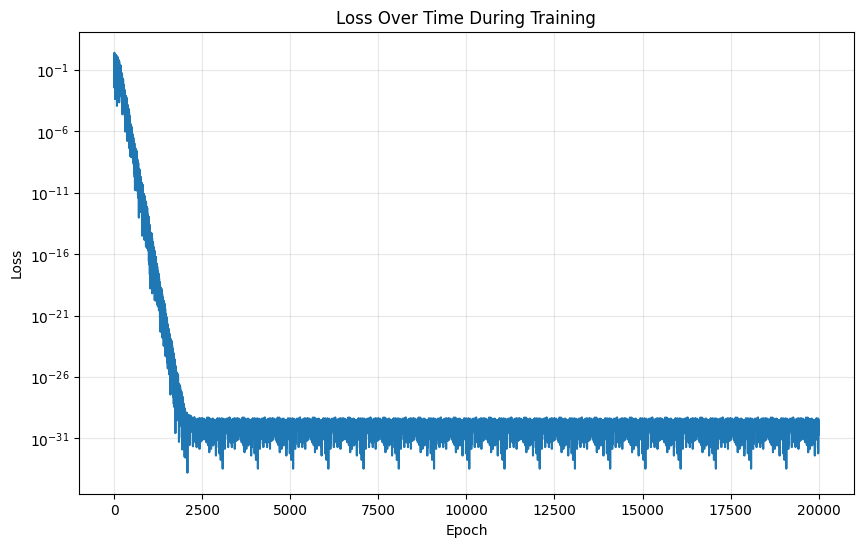

In [236]:
show_loss(loss_history)

# Execution

In [237]:

test_q1, test_q2 = 0.5, 0.3
test_input = [test_q1, test_q2]
output = forward(test_input, w, b)

# Expected values based on the training targets
expected_X1 = test_q1 * test_q2
expected_X2 = test_q1 / (test_q2 + 1e-6)

print(f"Input: q1={test_q1}, q2={test_q2}")
print(f"Network output: X1={output[0]:.4f}, X2={output[1]:.4f}")
print(f"Expected:       X1={expected_X1:.4f}, X2={expected_X2:.4f}")

Input: q1=0.5, q2=0.3
Network output: X1=0.8000, X2=0.2000
Expected:       X1=0.1500, X2=1.6667
